
#### The TropFlux zonal wind stress anomalies is used for this assignment.

#### The TropFlux surface wind stress data is computed from bias-corrected ERA-I 10 m wind using the COARE version 3 algorithm. The ERA-I 10 m wind biases are corrected based on the Global Tropical Moored Buoy Array data (Praveen Kumar et al., 2013). 

#### The TropFlux data covers between 1979 and 2016 with a horizontal resolution of 1$^o$ x 1$^o$, and it is downloaded from the Indian National Center for Ocean Information Services (INCOIS). 

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

### Part A

In [3]:
# Loadind the TropFlux zonal wind stress

dataDir = '/home/rmantrip/CLIM680/clim680_dataset/tropflux/'

ds = xr.open_dataset(dataDir+'taux_tropflux_1979.2017.nc')
taux = ds.taux

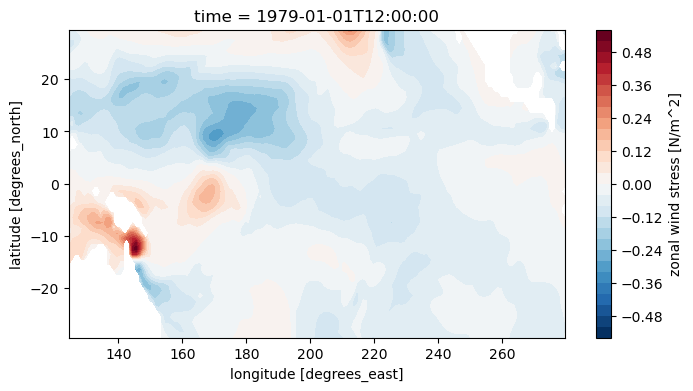

In [4]:
# Make a filled contour plot of zonal wind stress first time step

taux[0,:,:].sel(longitude=slice(124,280)).plot.contourf(figsize=(8,4),levels=35,add_colorbar=True)

### Part B

Text(0.5, 1.0, 'Global Tropical Zonal Wind Stress [N m$^{-2}$] - 1979-01-01')

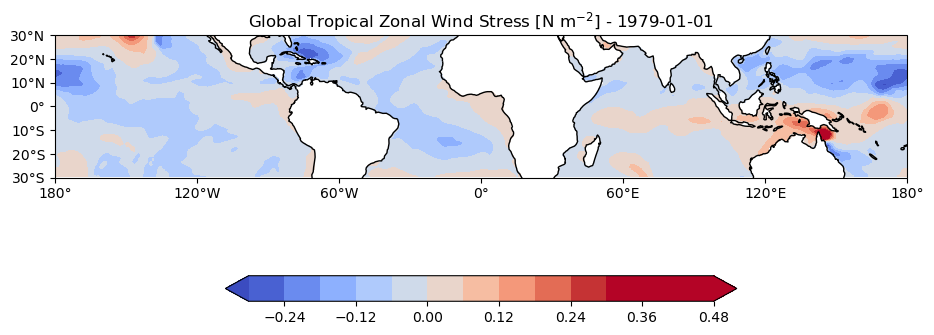

In [5]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=taux[0,:,:]
data, lons = add_cyclic_point(data, coord=ds['longitude'])

# Make a filled contour plot
cs=ax.contourf(lons, ds['latitude'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',vmin=-0.3,vmax=0.3,levels=15,extend='both')

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-30,31,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
cbar = plt.colorbar(cs,location='bottom',shrink=0.6) 

ax.set_title(r'Global Tropical Zonal Wind Stress [N m$^{-2}$] - '+str(taux.time[0].data)[:10])